In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from matplotlib.colors import ListedColormap

In [2]:
df = pd.read_csv('data/final_data_multi.csv')

In [3]:
df = df.drop(columns=["Unnamed: 0", "Student ID", "Assignment 1 lateness indicator", "Assignment 2 lateness indicator", "Assignment 3 lateness indicator"])

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 486 entries, 0 to 485
Data columns (total 19 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   # Logins                                      486 non-null    int64  
 1   # Content Reads                               486 non-null    int64  
 2   # Forum Reads                                 486 non-null    int64  
 3   # Forum Posts                                 486 non-null    int64  
 4   # Quiz Reviews before submission              486 non-null    int64  
 5   Assignment 1 duration to submit (in hours)    486 non-null    float64
 6   Assignment 2 duration to submit (in hours)    486 non-null    float64
 7   Assignment 3 duration to submit (in hours)    486 non-null    float64
 8   Average time to submit assignment (in hours)  486 non-null    float64
 9   Engagement Level                              486 non-null    obj

In [5]:
df.Class=[0 if i == "W" else 1 if i == "F" else 2 for i in df.Class]
df['Engagement Level']=[0 if i == "L" else 1 for i in df['Engagement Level']]

In [6]:
df['Class'].value_counts()

2    419
1     59
0      8
Name: Class, dtype: int64

In [7]:
X = df.drop(columns=["Class"])
y = df.Class

In [8]:
from sklearn.datasets import make_classification
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)

X, y = sm.fit_resample(X, y)

print('After OverSampling, the shape of train_X: {}'.format(X.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(len(y)))

After OverSampling, the shape of train_X: (1257, 18)
After OverSampling, the shape of train_y: 1257 



In [9]:
y.value_counts()

2    419
1    419
0    419
Name: Class, dtype: int64

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

In [11]:
X_train_perform = X_train.drop(columns=['# Logins', '# Content Reads', '# Forum Reads', '# Forum Posts', '# Quiz Reviews before submission', 'Assignment 1 duration to submit (in hours)', 'Assignment 2 duration to submit (in hours)', 'Assignment 3 duration to submit (in hours)', 'Average time to submit assignment (in hours)','Engagement Level'])
X_test_perform = X_test.drop(columns=['# Logins', '# Content Reads', '# Forum Reads', '# Forum Posts', '# Quiz Reviews before submission', 'Assignment 1 duration to submit (in hours)', 'Assignment 2 duration to submit (in hours)', 'Assignment 3 duration to submit (in hours)', 'Average time to submit assignment (in hours)','Engagement Level'])

In [12]:
X_train_perform.head()

,Quiz01 [10],Assignment01 [8],Midterm Exam [20],Assignment02 [12],Assignment03 [25],Final Exam [35],Course Grade,Total [100]
706,65,0,61,7,0,42,34,34
199,70,87,78,74,84,40,73,73
1013,31,51,54,59,64,44,56,57
1157,77,82,62,73,76,33,66,66
381,100,74,88,82,74,70,86,86


In [13]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, plot_confusion_matrix
from sklearn.model_selection import GridSearchCV

model = SVC()
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf', 'poly', 'sigmoid']}

# defining parameter range
grid = GridSearchCV(model, param_grid, refit=True, verbose=2, scoring='accuracy', return_train_score=True)
  
# fitting the model for grid search
grid_search=grid.fit(X_train_perform, y_train)

Fitting 5 folds for each of 75 candidates, totalling 375 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.1s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.1s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.1s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.1s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.1s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, k

[CV] END .....................C=1, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV] END .....................C=1, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV] END .....................C=1, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV] END ........................C=1, gamma=0.01, kernel=rbf; total time=   0.1s
[CV] END ........................C=1, gamma=0.01, kernel=rbf; total time=   0.1s
[CV] END ........................C=1, gamma=0.01, kernel=rbf; total time=   0.1s
[CV] END ........................C=1, gamma=0.01, kernel=rbf; total time=   0.1s
[CV] END ........................C=1, gamma=0.01, kernel=rbf; total time=   0.1s
[CV] END .......................C=1, gamma=0.01, kernel=poly; total time=   0.0s
[CV] END .......................C=1, gamma=0.01, kernel=poly; total time=   0.0s
[CV] END .......................C=1, gamma=0.01, kernel=poly; total time=   0.0s
[CV] END .......................C=1, gamma=0.01, kernel=poly; total time=   0.0s
[CV] END ...................

[CV] END ..................C=10, gamma=0.001, kernel=sigmoid; total time=   0.1s
[CV] END ..................C=10, gamma=0.001, kernel=sigmoid; total time=   0.1s
[CV] END ..................C=10, gamma=0.001, kernel=sigmoid; total time=   0.1s
[CV] END ..................C=10, gamma=0.001, kernel=sigmoid; total time=   0.1s
[CV] END .....................C=10, gamma=0.0001, kernel=rbf; total time=   0.0s
[CV] END .....................C=10, gamma=0.0001, kernel=rbf; total time=   0.0s
[CV] END .....................C=10, gamma=0.0001, kernel=rbf; total time=   0.0s
[CV] END .....................C=10, gamma=0.0001, kernel=rbf; total time=   0.0s
[CV] END .....................C=10, gamma=0.0001, kernel=rbf; total time=   0.0s
[CV] END ....................C=10, gamma=0.0001, kernel=poly; total time=   0.0s
[CV] END ....................C=10, gamma=0.0001, kernel=poly; total time=   0.0s
[CV] END ....................C=10, gamma=0.0001, kernel=poly; total time=   0.0s
[CV] END ...................

[CV] END ....................C=1000, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END ....................C=1000, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END ....................C=1000, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END ......................C=1000, gamma=0.1, kernel=rbf; total time=   0.1s
[CV] END ......................C=1000, gamma=0.1, kernel=rbf; total time=   0.1s
[CV] END ......................C=1000, gamma=0.1, kernel=rbf; total time=   0.1s
[CV] END ......................C=1000, gamma=0.1, kernel=rbf; total time=   0.1s
[CV] END ......................C=1000, gamma=0.1, kernel=rbf; total time=   0.1s
[CV] END .....................C=1000, gamma=0.1, kernel=poly; total time=   0.0s
[CV] END .....................C=1000, gamma=0.1, kernel=poly; total time=   0.0s
[CV] END .....................C=1000, gamma=0.1, kernel=poly; total time=   0.0s
[CV] END .....................C=1000, gamma=0.1, kernel=poly; total time=   0.0s
[CV] END ...................

In [14]:
print(grid_search.best_params_)

{'C': 0.1, 'gamma': 1, 'kernel': 'poly'}


In [15]:
accuracy = grid_search.best_score_ *100
print("Accuracy for our training dataset with tuning is : {:.2f}%".format(accuracy) )

Accuracy for our training dataset with tuning is : 99.90%


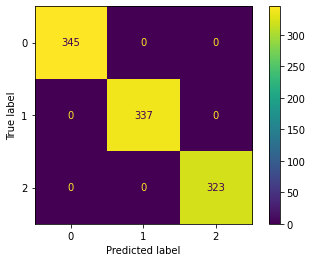

In [16]:
plot_confusion_matrix(grid, X_train_perform, y_train, values_format='d')

In [17]:
def boundary_plot(train_x, train_y, test_x, test_y, title, x_label="", y_label=""):
    
    model = SVC(C=0.1, gamma=1, kernel='poly')
    model.fit(train_x, train_y)
    
    plt.figure(figsize=(10,6))
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plot_decision_regions(test_x, test_y, clf=model, legend=2)

In [18]:
from sklearn.metrics import precision_recall_fscore_support
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import mean_squared_error
from math import sqrt

model = SVC(C=0.1, gamma=1, kernel='poly')
model.fit(X_train_perform, y_train)
y_pred = model.predict(X_test_perform)
mse = mean_squared_error(y_test, y_pred)
rmse = sqrt(mse)
rmse

0.0

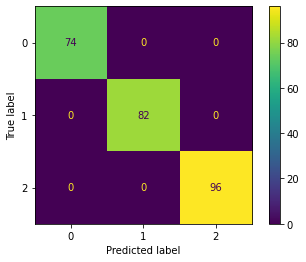

In [19]:
plot_confusion_matrix(model, X_test_perform, y_test)  
plt.show()  

In [20]:
precision_recall_fscore_support(y_test, y_pred, average='macro')

(1.0, 1.0, 1.0, None)

In [21]:
precision_recall_fscore_support(y_test, y_pred, average='micro')

(1.0, 1.0, 1.0, None)

In [22]:
precision_recall_fscore_support(y_test, y_pred, average='weighted')

(1.0, 1.0, 1.0, None)

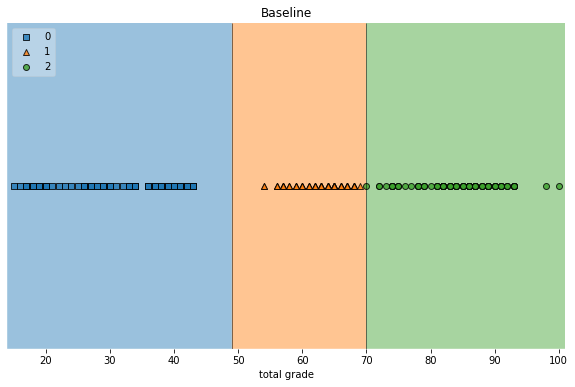

In [23]:
train_temp = X_train_perform.values[:,7]
train_temp = train_temp[:, None]
test_temp = X_test_perform.values[:,7]
test_temp = test_temp[:, None]

boundary_plot(train_temp, y_train.values, test_temp, y_test.values, "Baseline", x_label="total grade")

In [24]:
model = SVC(C=0.1, gamma=1, kernel='poly')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = sqrt(mse)
rmse

0.0

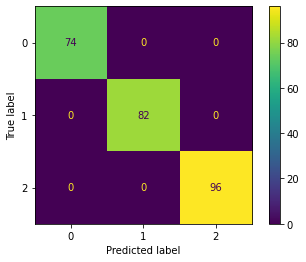

In [25]:
plot_confusion_matrix(model, X_test, y_test)  
plt.show() 

In [26]:
precision_recall_fscore_support(y_test, y_pred, average='macro')

(1.0, 1.0, 1.0, None)

In [27]:
precision_recall_fscore_support(y_test, y_pred, average='micro')

(1.0, 1.0, 1.0, None)

In [28]:
precision_recall_fscore_support(y_test, y_pred, average='weighted')

(1.0, 1.0, 1.0, None)

In [29]:
X_train.head()

,# Logins,# Content Reads,# Forum Reads,# Forum Posts,# Quiz Reviews before submission,Assignment 1 duration to submit (in hours),Assignment 2 duration to submit (in hours),Assignment 3 duration to submit (in hours),Average time to submit assignment (in hours),Engagement Level,Quiz01 [10],Assignment01 [8],Midterm Exam [20],Assignment02 [12],Assignment03 [25],Final Exam [35],Course Grade,Total [100]
706,26,152,0,0,2,558.000000,260.555598,632.000000,483.518533,0,65,0,61,7,0,42,34,34
199,109,368,0,0,2,329.133333,237.083333,256.116667,274.111111,0,70,87,78,74,84,40,73,73
1013,75,294,0,0,2,205.575620,93.131474,133.231809,143.979634,1,31,51,54,59,64,44,56,57
1157,52,175,0,0,0,331.239124,238.874843,266.073827,278.729265,0,77,82,62,73,76,33,66,66
381,107,612,0,0,0,119.600000,30.850000,51.883333,67.444444,1,100,74,88,82,74,70,86,86


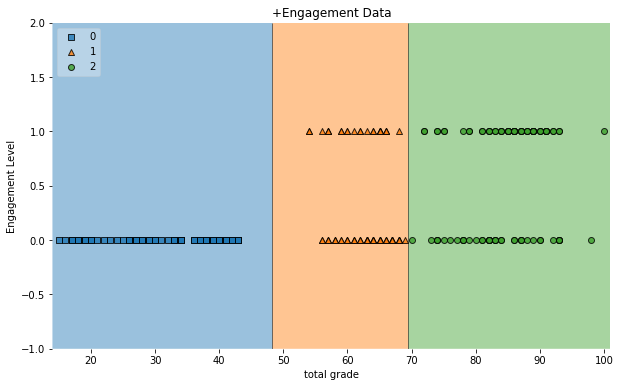

In [30]:
train_temp = X_train.values[:,[17,9]]
test_temp = X_test.values[:,[17,9]]

boundary_plot(train_temp, y_train.values, test_temp, y_test.values, "+Engagement Data", x_label="total grade", y_label="Engagement Level")